<a href="https://colab.research.google.com/github/Naveenkumar-The-magician/Exploratory-dataanalysis-Terrorism/blob/main/Task1_Exploratory_dataanalysis_Terrorism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Exploratory dataanalysis Terrorism**

In [ ]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the dataset
df=pd.read_csv("/content/globalterrorismdb_0718dist.csv", encoding='ISO-8859-1')

# Display the last few rows of the dataset
df.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
29970,198701150035,1987.0,1.0,15.0,NaN,0.0,NaN,160.0,Philippines,5.0,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,"198701150035, 198701150023, 198701150024, 1987..."
29971,198701150036,1987.0,1.0,15.0,NaN,0.0,NaN,160.0,Philippines,5.0,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
29972,198701160001,1987.0,1.0,16.0,NaN,0.0,NaN,159.0,Peru,3.0,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
29973,198701160002,1987.0,1.0,16.0,NaN,0.0,NaN,61.0,El Salvador,2.0,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
29974,198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [ ]:
#Renaming the columns

df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [ ]:
#As there are too many columns in dataset, we are taking only important columns from the dataset for data preprocessing

df = df[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [ ]:
#checking null values
df.isnull().sum()

Year               1
Month              1
Day                1
Country            1
state            120
Region             1
city               1
latitude        1578
longitude       1578
AttackType         1
Killed          5528
Wounded         7277
Target           359
Summary        28883
Group              1
Target_type        1
Weapon_type        1
Motive         29154
dtype: int64

In [ ]:
df.shape

(29975, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29975 entries, 0 to 29974
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         29974 non-null  float64
 1   Month        29974 non-null  float64
 2   Day          29974 non-null  float64
 3   Country      29974 non-null  object 
 4   state        29855 non-null  object 
 5   Region       29974 non-null  object 
 6   city         29974 non-null  object 
 7   latitude     28397 non-null  float64
 8   longitude    28397 non-null  float64
 9   AttackType   29974 non-null  object 
 10  Killed       24447 non-null  float64
 11  Wounded      22698 non-null  float64
 12  Target       29616 non-null  object 
 13  Summary      1092 non-null   object 
 14  Group        29974 non-null  object 
 15  Target_type  29974 non-null  object 
 16  Weapon_type  29974 non-null  object 
 17  Motive       821 non-null    object 
dtypes: float64(7), object(11)
memory usage: 4.1+ M

In [ ]:
df.describe()

,Year,Month,Day,latitude,longitude,Killed,Wounded
count,29974.000000,29974.000000,29974.000000,28397.000000,2.839700e+04,24447.000000,22698.000000
mean,1980.792086,6.350404,15.175952,19.813379,-3.067458e+03,2.194380,1.712221
std,4.065549,3.398355,8.881986,25.440026,5.114460e+05,9.497849,11.478994
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1979.000000,3.000000,8.000000,6.313712,-8.304792e+01,0.000000,0.000000
50%,1981.000000,6.000000,15.000000,15.030000,-6.606113e+01,0.000000,0.000000
75%,1984.000000,9.000000,23.000000,41.733244,9.174508e+00,1.000000,0.000000
max,1987.000000,12.000000,31.000000,64.837778,1.747763e+02,422.000000,751.000000


In [ ]:
df['Year'].value_counts(dropna = False).sort_index()

1970.0     651
1971.0     471
1972.0     568
1973.0     473
1974.0     581
1975.0     740
1976.0     923
1977.0    1319
1978.0    1526
1979.0    2662
1980.0    2662
1981.0    2586
1982.0    2544
1983.0    2870
1984.0    3495
1985.0    2915
1986.0    2860
1987.0     128
NaN          1
Name: Year, dtype: int64

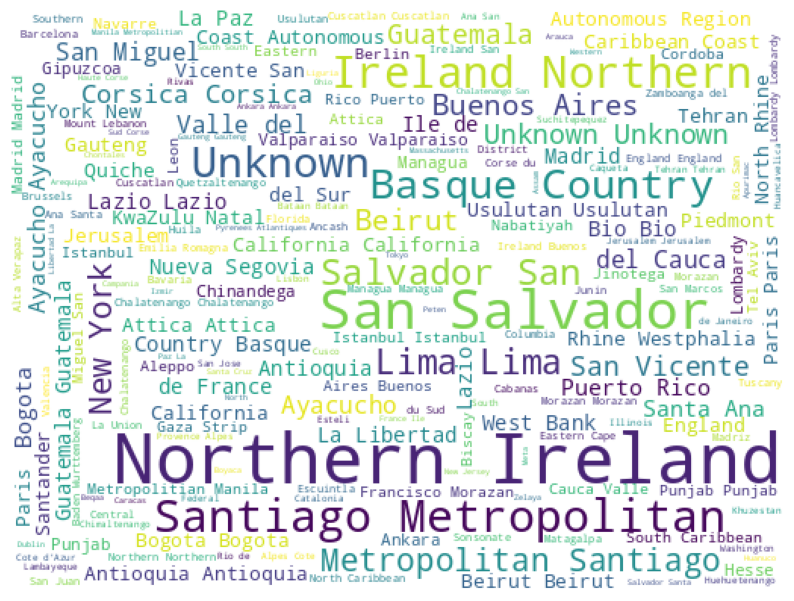

In [ ]:
from wordcloud import WordCloud
from scipy import signal
cities = df.state.dropna()
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(background_color = 'white',
                     width = 512,
                     height = 384).generate(' '.join(cities))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

## **Data Visualization**

**People Killed and Wounded In Each Year**

In [ ]:
b=df[["Year","Wounded"]].groupby("Year").sum()
b.head()

,Wounded
Year,
1970.0,212.0
1971.0,82.0
1972.0,409.0
1973.0,495.0
1974.0,865.0


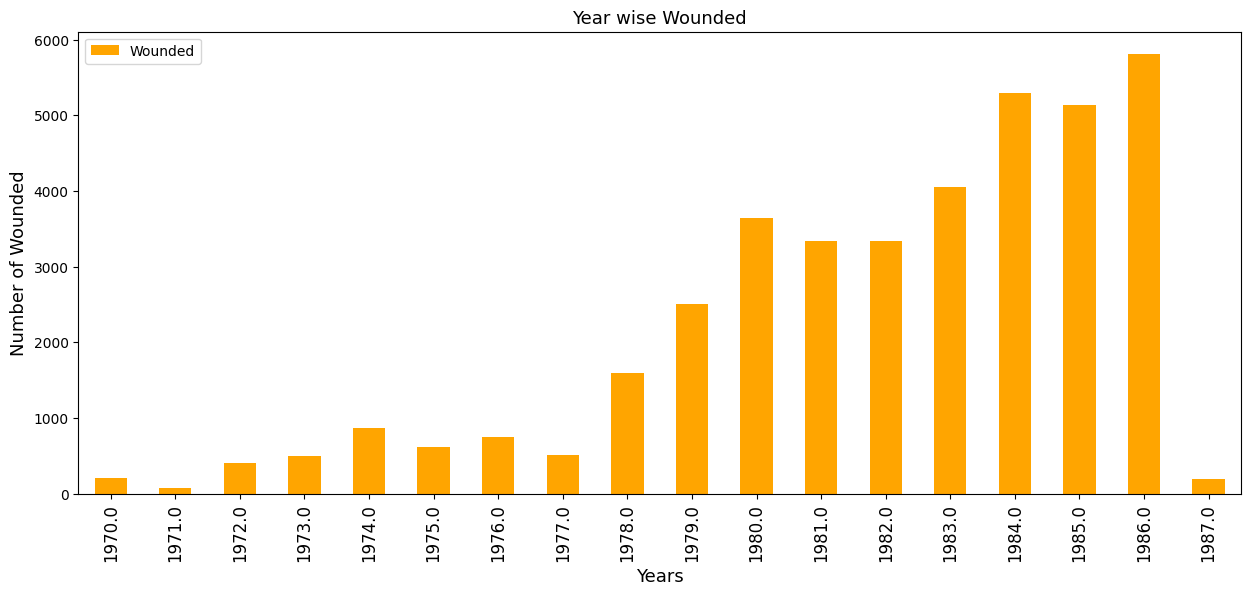

In [ ]:
b.plot(kind="bar",color="orange",figsize=(15,6))
plt.title("Year wise Wounded",fontsize=13)
plt.xlabel("Years",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Wounded",fontsize=13)
plt.show()

In [ ]:
k=df[["Year","Killed"]].groupby("Year").sum()
k.head()

,Killed
Year,
1970.0,174.0
1971.0,173.0
1972.0,566.0
1973.0,370.0
1974.0,539.0


In [ ]:
w=df[["Year","Wounded"]].groupby("Year").sum()
w.head()

,Wounded
Year,
1970.0,212.0
1971.0,82.0
1972.0,409.0
1973.0,495.0
1974.0,865.0


Text(0, 0.5, 'Number of People Wounded')

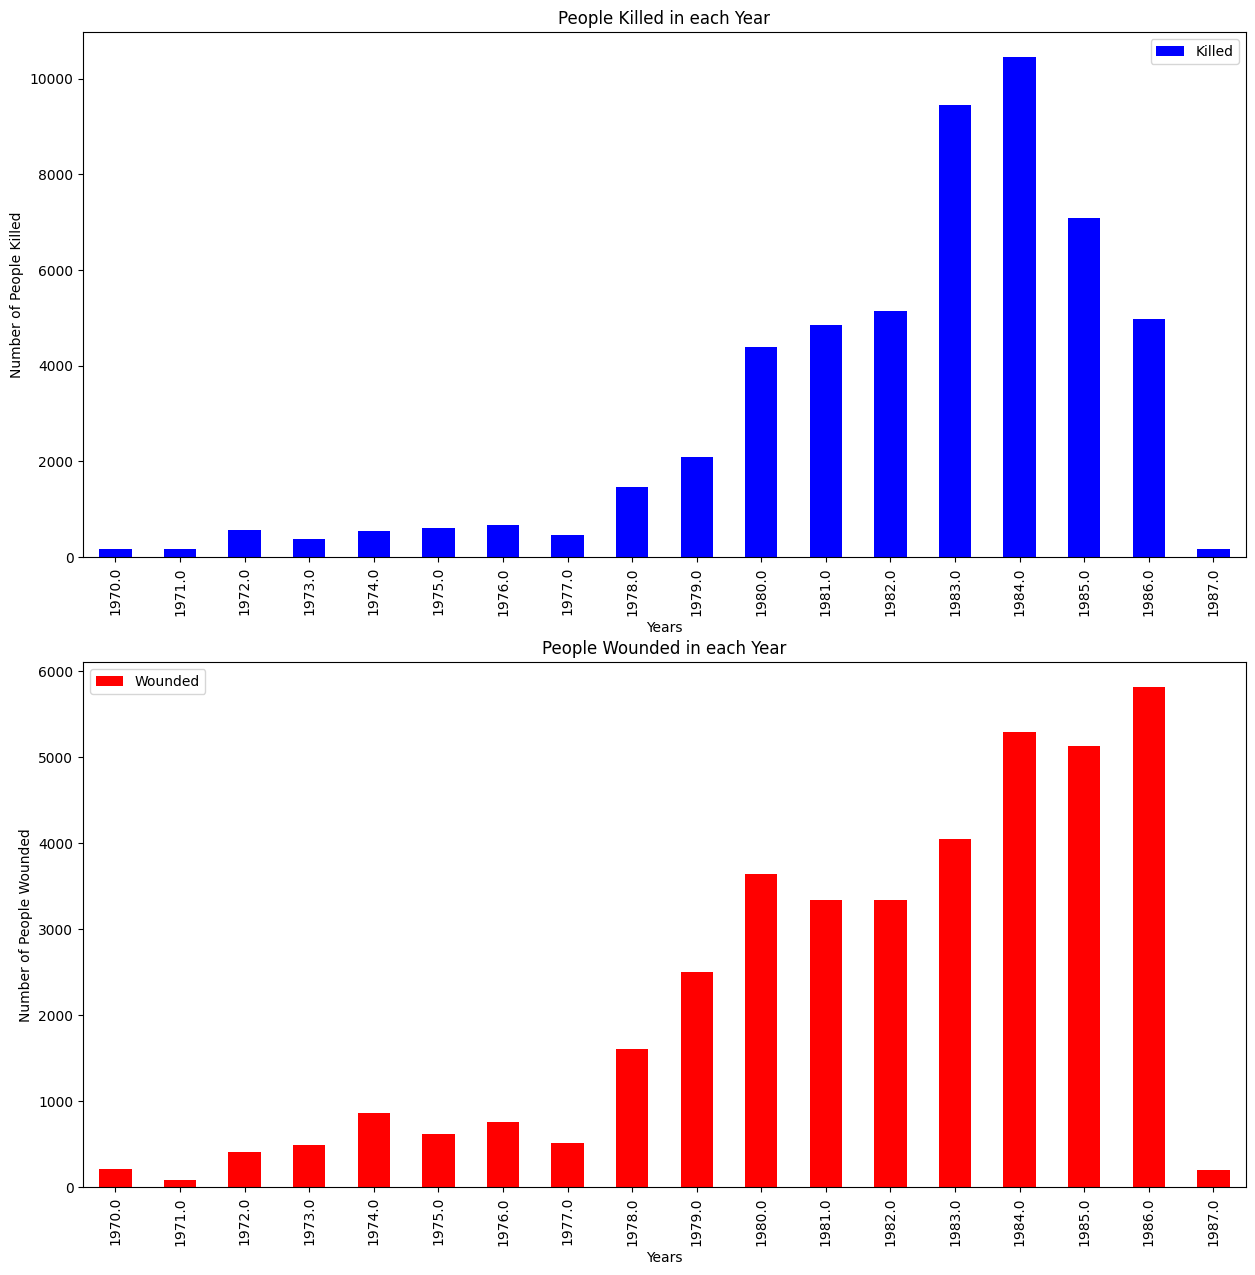

In [ ]:
fig=plt.figure()
ax0=fig.add_subplot(2,1,1)
ax1=fig.add_subplot(2,1,2)

#Killed
k.plot(kind="bar",color="blue",figsize=(15,15),ax=ax0)
ax0.set_title("People Killed in each Year")
ax0.set_xlabel("Years")
ax0.set_ylabel("Number of People Killed")

#Wounded
w.plot(kind="bar",color="red",figsize=(15,15),ax=ax1)
ax1.set_title("People Wounded in each Year")
ax1.set_xlabel("Years")
ax1.set_ylabel("Number of People Wounded")

**Number of Terrorist Activities each Year**


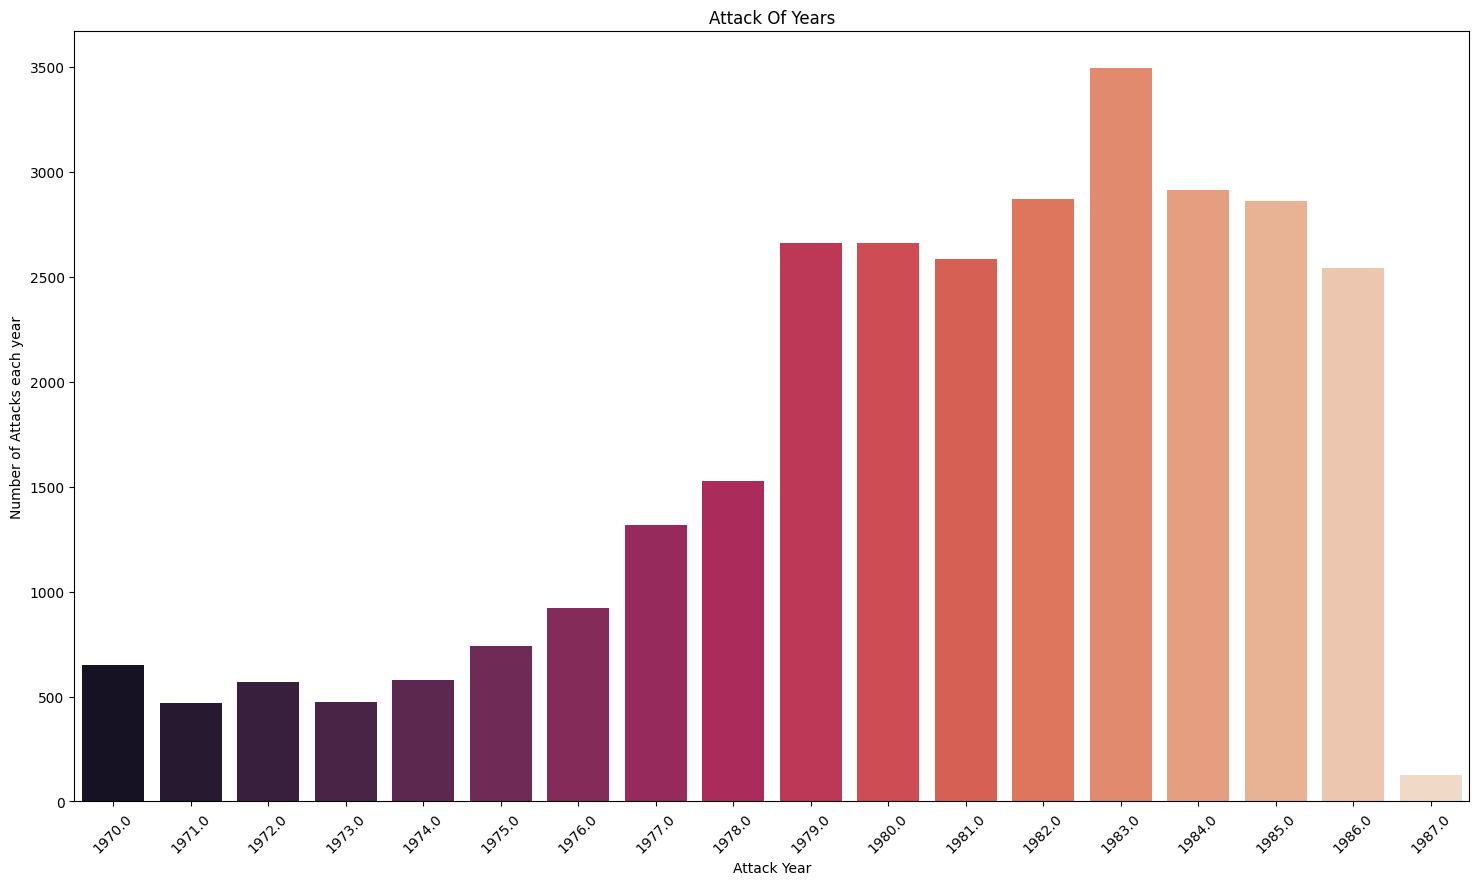

In [ ]:
x_year = df['Year'].unique()
y_count_years = df['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = x_year,
           y = y_count_years,
           palette = 'rocket')
plt.xticks(rotation = 45)
plt.xlabel('Attack Year')
plt.ylabel('Number of Attacks each year')
plt.title('Attack Of Years')
plt.show()

Text(0.5, 1.0, 'Number Of Terrorist Activities Each Year')

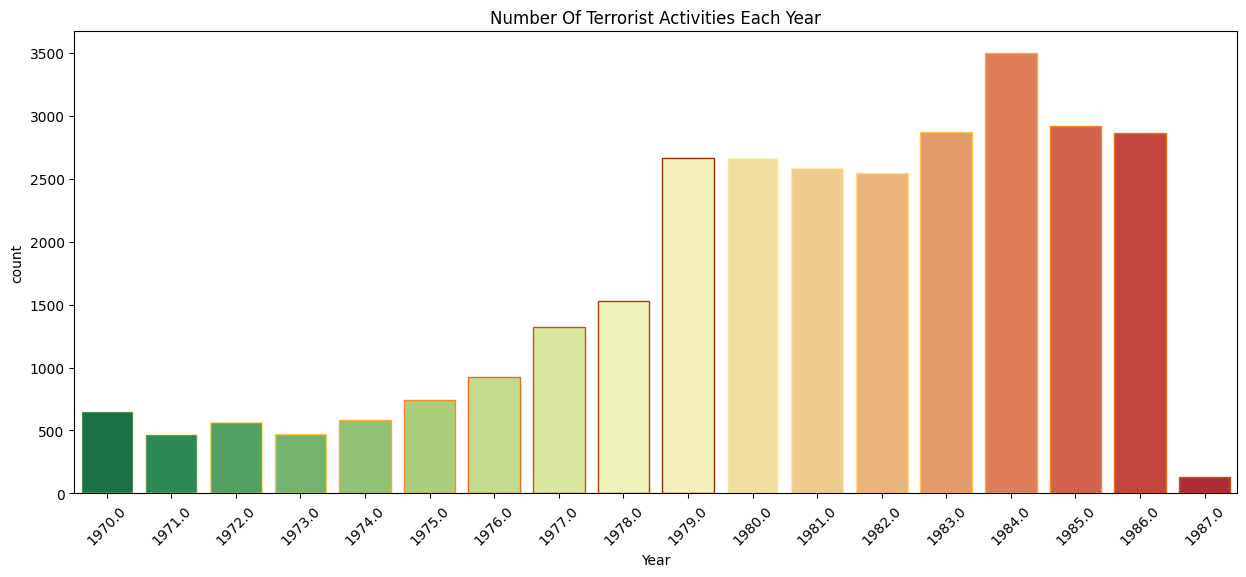

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.subplots(figsize=(15, 6))
sns.countplot(x='Year', data=df, palette='RdYlGn_r', edgecolor=sns.color_palette("YlOrBr", 10))
plt.xticks(rotation=45)
plt.title('Number Of Terrorist Activities Each Year')

**Terrorist Activities by Region in each Year through Area Plot**

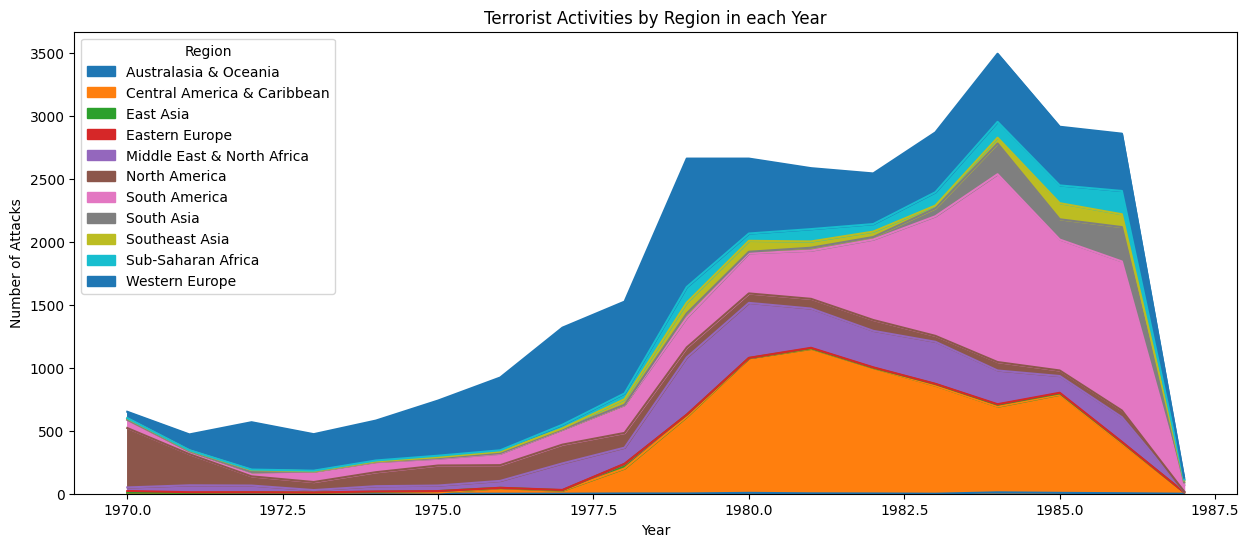

In [ ]:
pd.crosstab(df.Year, df.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

In [ ]:
df['Wounded'] = df['Wounded'].fillna(0).astype(int)
df['Killed'] = df['Killed'].fillna(0).astype(int)
df['casualities'] = df['Killed'] + df['Wounded']

Values are sorted by the top 40 worst terror attacks as to keep the heatmap simple and easy to visualize

## **Heatmap**

In [ ]:
t1 = df.sort_values(by='casualities',ascending=False)[:40]
heat=t1.pivot_table(index='Country',columns='Year',values='casualities')
heat.fillna(0,inplace=True)
heat.head()

Year,1973.0,1976.0,1978.0,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0
Country,,,,,,,,,,
Angola,0.0,0.0,0.0,0.0,0.0,0.0,396.0,0.0,0.0,0.0
Canada,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,329.0,0.0
El Salvador,0.0,0.0,0.0,300.0,0.0,0.0,180.0,0.0,0.0,0.0
Ethiopia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,400.0,0.0,0.0
Iran,0.0,0.0,422.0,0.0,0.0,760.0,0.0,318.0,0.0,0.0


In [ ]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
colorscale = [[0, '#edf8fb'], [.3, '#00BFFF'],  [.6, '#8856a7'],  [1, '#810f7c']]
heatmap = go.Heatmap(z=heat.values, x=heat.columns, y=heat.index, colorscale=colorscale)
data = [heatmap]
layout = go.Layout(
    title='Top 40 Worst Terror Attacks in History from 1982 to 2016',
    xaxis = dict(ticks='', nticks=20),
    yaxis = dict(ticks='')
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='heatmap',show_link=False)

In [ ]:
reg=pd.crosstab(df.Year,df.Region)
reg.head()

Region,Australasia & Oceania,Central America & Caribbean,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,,
1970.0,1,7,2,12,28,472,65,1,10,3,50
1971.0,1,5,1,5,55,247,24,0,6,2,125
1972.0,8,3,0,1,53,73,33,1,16,4,376
1973.0,1,6,2,1,19,64,83,1,2,4,290
1974.0,1,11,4,2,42,111,81,2,3,7,317


In [ ]:
regt=reg.transpose()
regt["Total"]=regt.sum(axis=1)
a=regt["Total"].sort_values(ascending=False)
a

Region
Western Europe                 8127
South America                  7067
Central America & Caribbean    6856
Middle East & North Africa     3065
North America                  2046
Sub-Saharan Africa             1023
South Asia                      869
Southeast Asia                  687
East Asia                       136
Australasia & Oceania            50
Eastern Europe                   48
Name: Total, dtype: int64

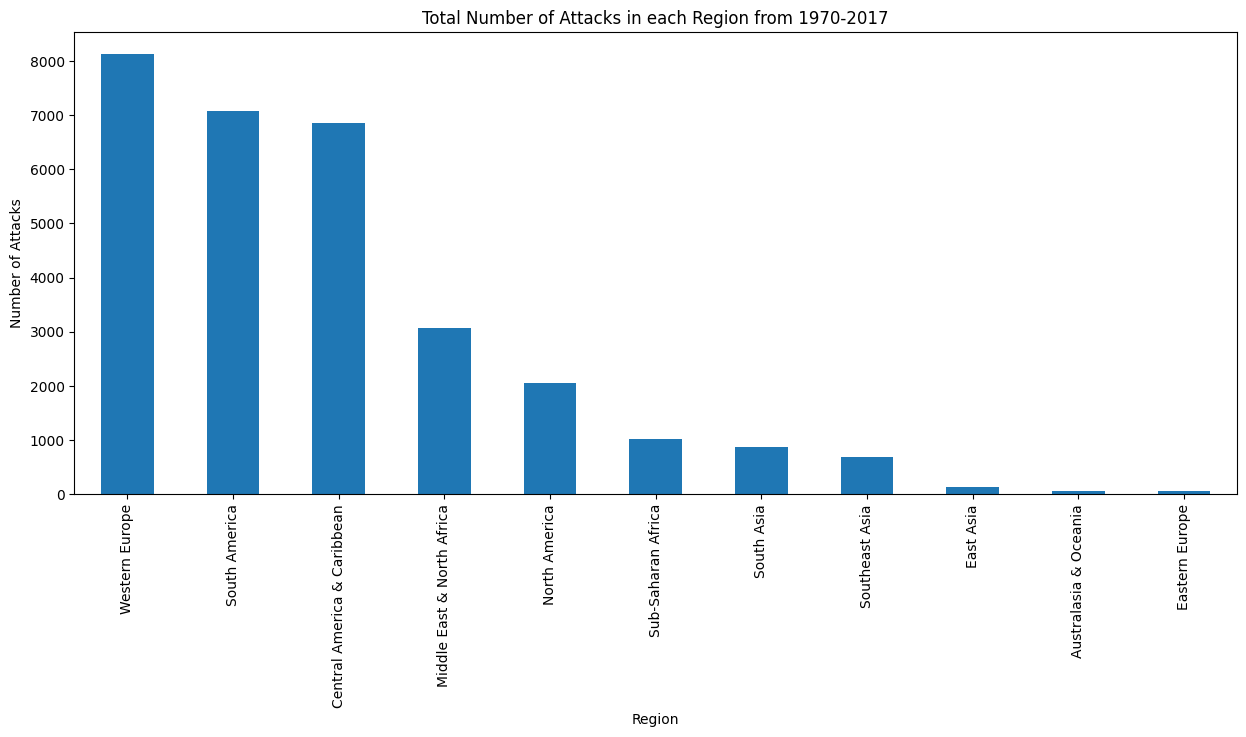

In [ ]:
a.plot(kind="bar",figsize=(15,6))
plt.title("Total Number of Attacks in each Region from 1970-2017")
plt.xlabel("Region")
plt.ylabel("Number of Attacks")
plt.show()

# **Top Countries affected by Terror Attacks**

In [ ]:
df.Country.value_counts()[:15]

El Salvador       3616
Peru              2671
United Kingdom    2503
Colombia          2123
United States     1891
Spain             1848
Nicaragua         1467
Guatemala         1440
Chile             1312
Italy             1262
France            1165
Lebanon            993
Turkey             625
Philippines        531
South Africa       521
Name: Country, dtype: int64

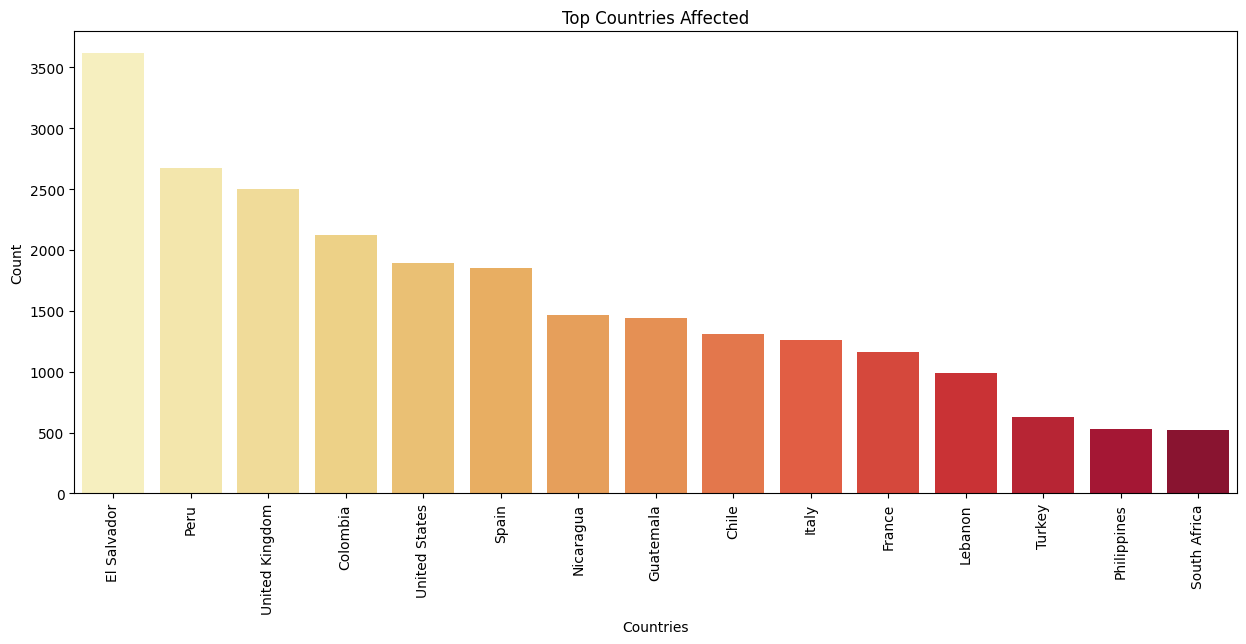

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.subplots(figsize=(15, 6))
top_countries = df['Country'].value_counts()[:15]
sns.barplot(x=top_countries.index, y=top_countries.values,  palette='YlOrRd')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

## **Customized Data Analysis**

**Terrorist Attacks of a Particular year and their Locations**

In [ ]:
import folium
from folium.plugins import MarkerCluster
filterYear = df['Year'] == 1974

In [ ]:
filterData = df[filterYear] # filter data
# filterData.info()
reqFilterData = filterData.loc[:,'city':'longitude'] #We are getting the required fields
reqFilterData = reqFilterData.dropna() # drop NaN values in latitude and longitude
reqFilterDataList = reqFilterData.values.tolist()
# reqFilterDataList

In [ ]:
map = folium.Map(location = [0, 30], tiles='CartoDB positron', zoom_start=2)
# clustered marker
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for point in range(0, len(reqFilterDataList)):
    folium.Marker(location=[reqFilterDataList[point][1],reqFilterDataList[point][2]],
                  popup = reqFilterDataList[point][0]).add_to(markerCluster)
map

In 1970, the American continent accounted for 84% of all terrorist attacks, while the Middle East and North Africa, which are now known as hotspots for conflicts and terrorism, experienced just one terrorist incident during that year.

## **Types of terrorist attacks that cause deaths**

In [ ]:
# Total Number of people killed in terror attack
killData = df.loc[:,'Killed']
print('Number of people killed by terror attack:', int(sum(killData.dropna())))# drop the NaN values

Number of people killed by terror attack: 53646


In [ ]:
# Let's look at what types of attacks these deaths were made of.
attackData = df.loc[:,'AttackType']
# attackData
typeKillData = pd.concat([attackData, killData], axis=1)
typeKillData.head()

,AttackType,Killed
0,Assassination,1
1,Hostage Taking (Kidnapping),0
2,Assassination,1
3,Bombing/Explosion,0
4,Facility/Infrastructure Attack,0


In [ ]:
typeKillFormatData = typeKillData.pivot_table(columns='AttackType', values='Killed', aggfunc='sum')
typeKillFormatData

AttackType,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
Killed,30020,5769,11310,1095,396,467,640,27,3922


In [ ]:
typeKillFormatData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, Killed to Killed
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   Armed Assault                        1 non-null      int64
 1   Assassination                        1 non-null      int64
 2   Bombing/Explosion                    1 non-null      int64
 3   Facility/Infrastructure Attack       1 non-null      int64
 4   Hijacking                            1 non-null      int64
 5   Hostage Taking (Barricade Incident)  1 non-null      int64
 6   Hostage Taking (Kidnapping)          1 non-null      int64
 7   Unarmed Assault                      1 non-null      int64
 8   Unknown                              1 non-null      int64
dtypes: int64(9)
memory usage: 188.0+ bytes


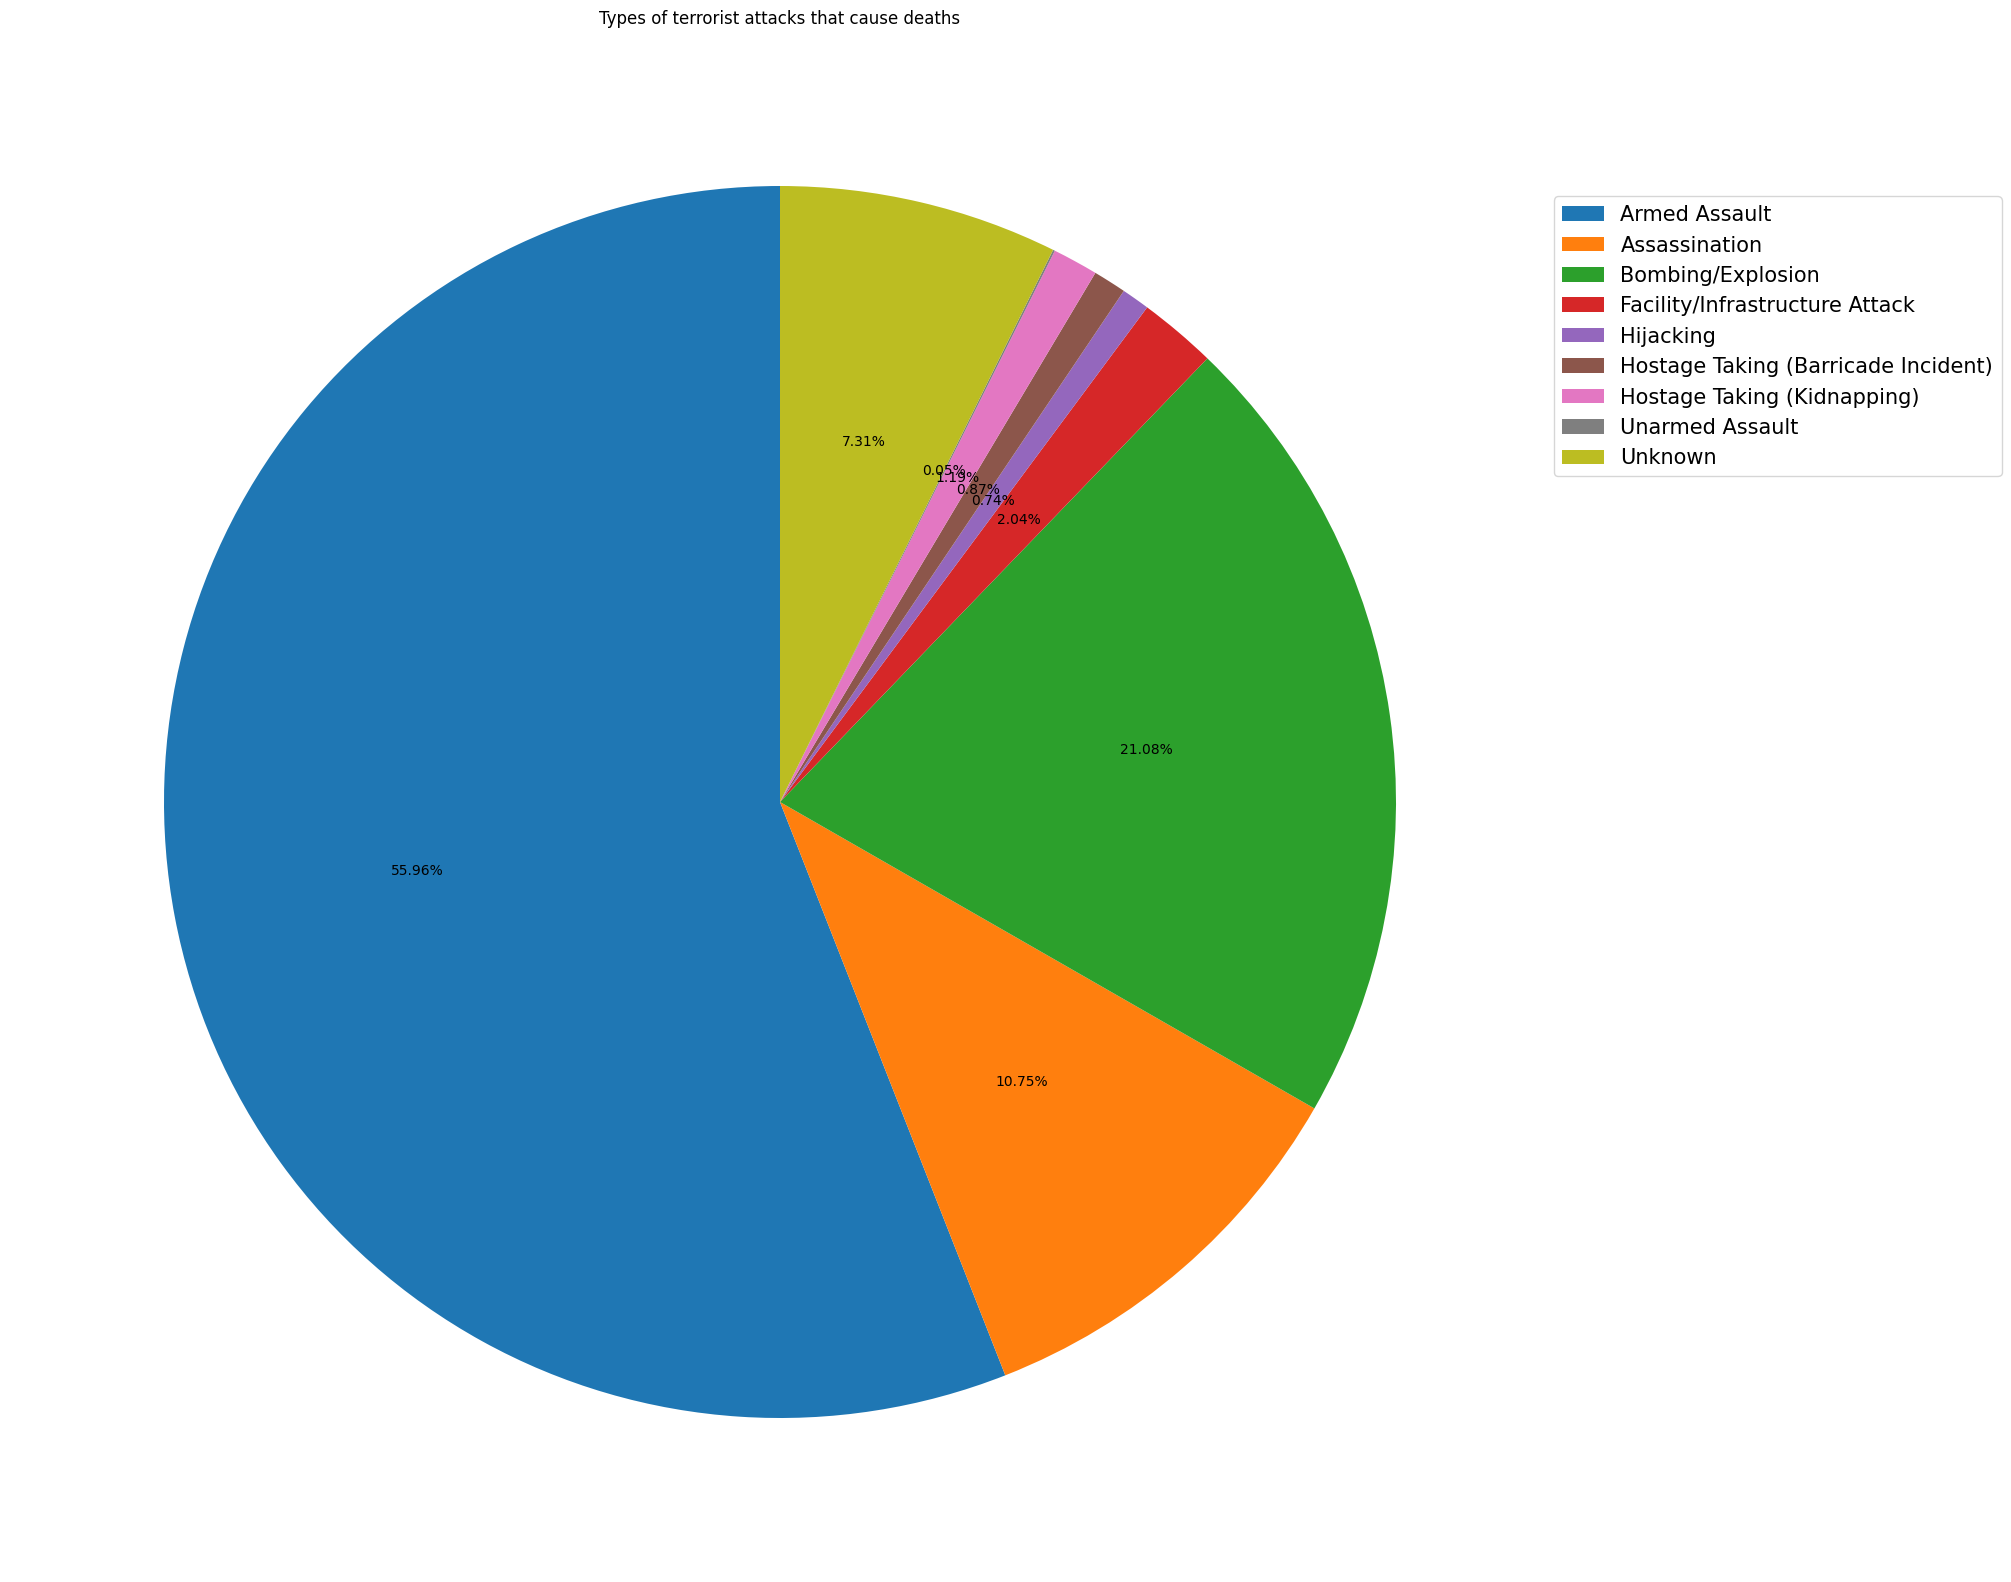

In [ ]:
import numpy as np

labels = typeKillFormatData.columns.tolist() # convert line to list
transpoze = typeKillFormatData.T # transpoze

# Assuming values is a 2D array
values = transpoze.values.tolist()
values = np.array(values).flatten()  # Flatten the 2D array to make it 1D

fig, ax = plt.subplots(figsize=(20, 20), subplot_kw=dict(aspect="equal"))
plt.pie(values, startangle=90, autopct='%.2f%%')
plt.title('Types of terrorist attacks that cause deaths')
plt.legend(labels, loc='upper right', bbox_to_anchor=(1.3, 0.9), fontsize=15)  # location legend
plt.show()

The combination of armed assaults and bombings/explosions accounts for a significant portion, specifically 77%, of the fatalities resulting from these attacks. This high fatality rate underscores the recurring use of these tactics in terrorist activities, highlighting the profound threat posed by weapons and explosives on a global scale.

# **Number of People Killed in Terrorist Attacks (By Countries)**

In [ ]:
#Number of Killed in Terrorist Attacks by Countries
countryData = df.loc[:,'Country']
# countyData
countryKillData = pd.concat([countryData, killData], axis=1)

In [ ]:
countryKillFormatData = countryKillData.pivot_table(columns='Country', values='Killed', aggfunc='sum')
countryKillFormatData

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Argentina,Australia,Austria,Bahamas,Bahrain,...,Uruguay,Vatican City,Venezuela,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yugoslavia,Zaire,Zambia,Zimbabwe
Killed,53,0,0,0,610,335,7,18,0,0,...,4,0,59,73,88,1,6,3,7,69


In [ ]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size

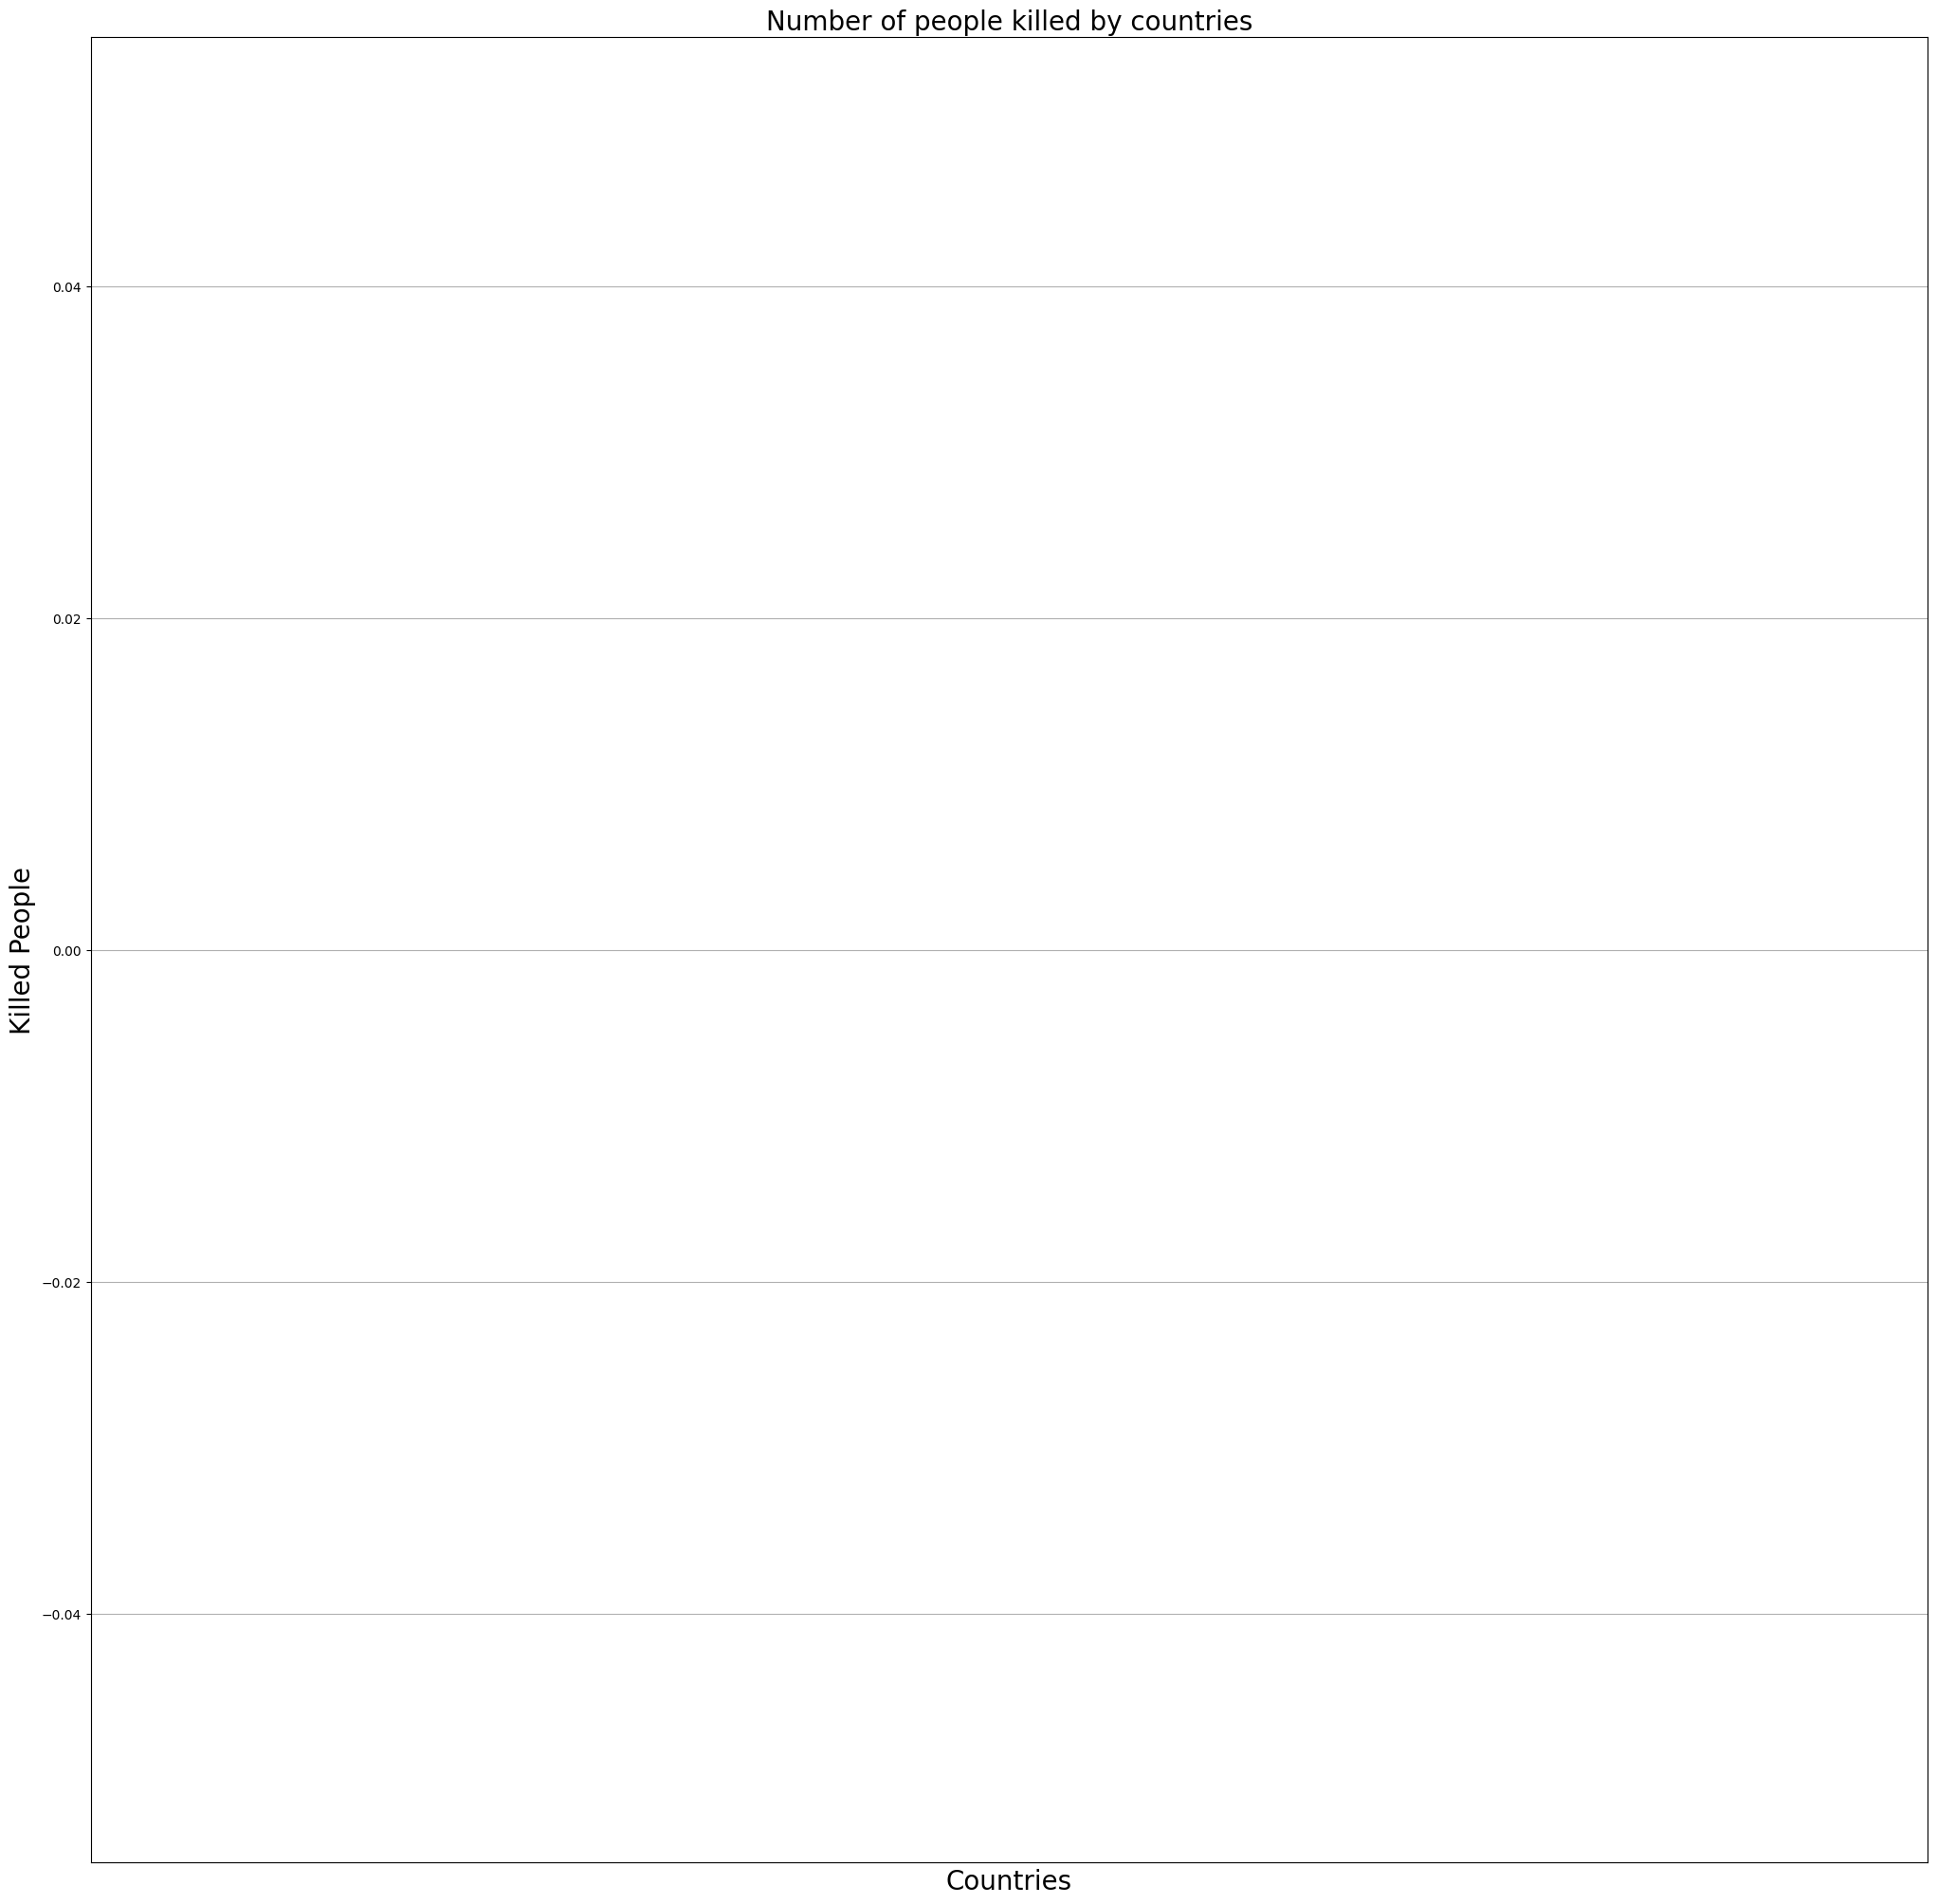

In [ ]:
labels = countryKillFormatData.columns.tolist()
labels = labels[152:206]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[152:206]
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=20)
plt.xlabel('Countries', fontsize = 20)
plt.xticks(index, labels, fontsize=18, rotation=90)
plt.title('Number of people killed by countries', fontsize = 20)
plt.show()

**Region Wise Casuality**

In [ ]:
c=df[["Region","Wounded"]].groupby("Region").sum().sort_values(by="Wounded",ascending=False)
c

,Wounded
Region,
Middle East & North Africa,11649
Western Europe,7707
Central America & Caribbean,4670
South Asia,3363
South America,3330
Southeast Asia,3232
Sub-Saharan Africa,3034
North America,1605
East Asia,149


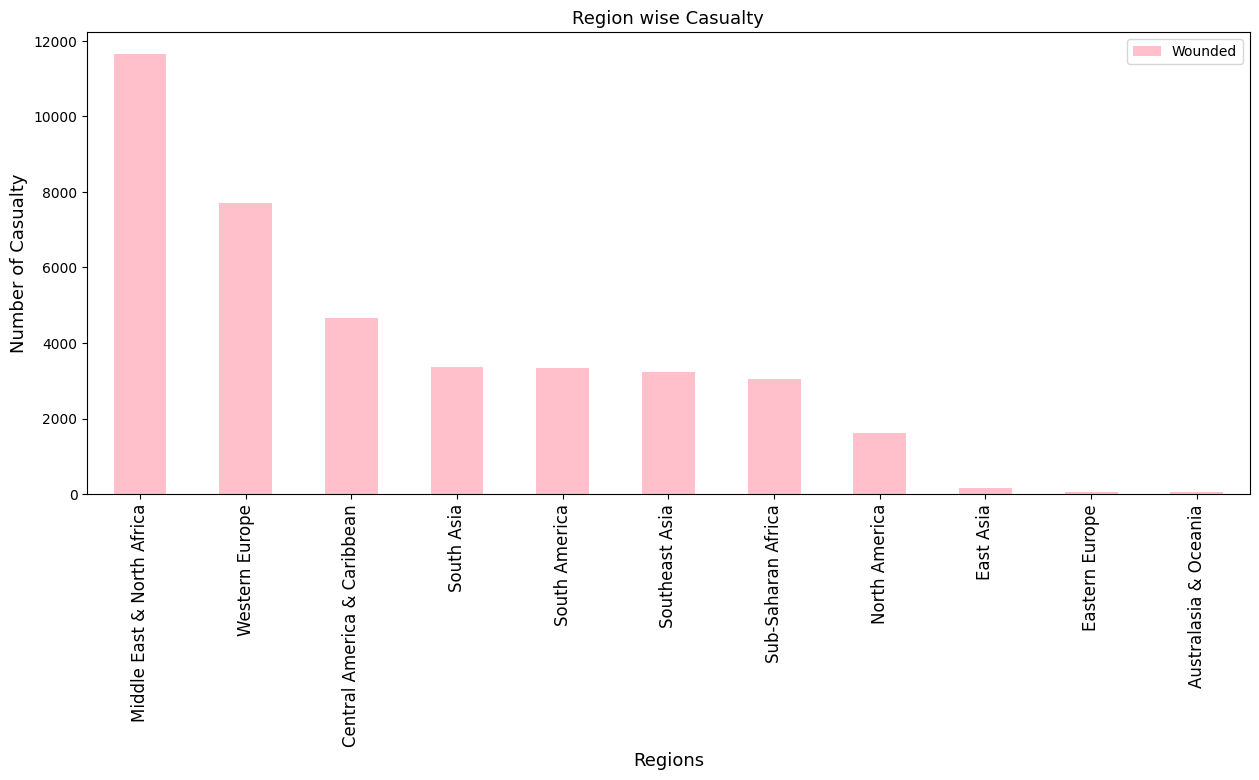

In [ ]:
c.plot(kind="bar",color="pink",figsize=(15,6))
plt.title("Region wise Casualty",fontsize=13)
plt.xlabel("Regions",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualty",fontsize=13)
plt.show()


**People Killed and Wounded In Each Region**

In [ ]:
k=df[["Region","Killed"]].groupby("Region").sum().sort_values(by="Killed",ascending=False)
k

,Killed
Region,
Central America & Caribbean,24578
South America,10290
Middle East & North Africa,5152
Western Europe,4160
Sub-Saharan Africa,3290
South Asia,2914
Southeast Asia,2483
North America,666
East Asia,51


In [ ]:
w=df[["Region","Wounded"]].groupby("Region").sum().sort_values(by="Wounded",ascending=False)
w

,Wounded
Region,
Middle East & North Africa,11649
Western Europe,7707
Central America & Caribbean,4670
South Asia,3363
South America,3330
Southeast Asia,3232
Sub-Saharan Africa,3034
North America,1605
East Asia,149


<function matplotlib.pyplot.show(close=None, block=None)>

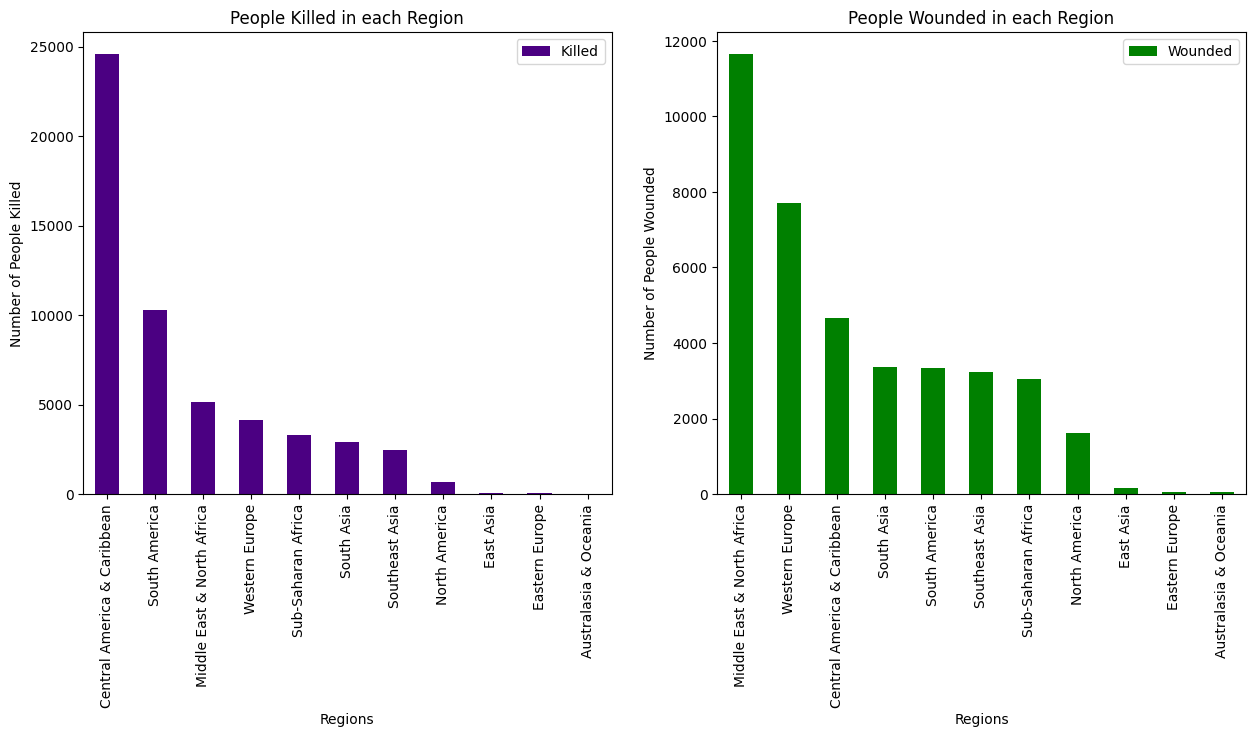

In [ ]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#People Killed
k.plot(kind="bar",color="indigo",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed in each Region")
ax0.set_xlabel("Regions")
ax0.set_ylabel("Number of People Killed")

#People Wounded
w.plot(kind="bar",color="green",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in each Region")
ax1.set_xlabel("Regions")
ax1.set_ylabel("Number of People Wounded")

plt.show

### **Conclusion**

Terrorist incidents in the Middle East and Northern Africa region have been associated with severe and deadly outcomes. This region has been identified as a hotspot for significant terrorist attacks. Contrary to a common perception linking Muslims with terrorism, it is worth noting that Muslims are often the primary victims of these terrorist acts. A closer examination of the data visualizations reveals that Iraq, Afghanistan, and Pakistan are among the most adversely affected nations, and it's noteworthy that these countries are predominantly Muslim.